In [424]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from  matplotlib.pyplot import figure
from datetime import datetime
import matplotlib.dates as mdates

In [425]:
file_path = '../../Resources/NYT_counties_data.csv'
NYT_df = pd.read_csv(file_path)
file_path = '../../Resources/UnemploymentUSA.csv'
unemployment_df = pd.read_csv(file_path)
NYT_df.head()

,Unnamed: 0,date,county,state,fips,cases,deaths
0,0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,3,2020-01-24,Cook,Illinois,17031.0,1,0
4,4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [426]:
deathSumCounty_df = NYT_df.groupby("county").sum()
deathSumCounty_df.head()

,Unnamed: 0,fips,cases,deaths
county,,,,
Abbeville,532635,1035023.0,91,0
Acadia,498654,440020.0,835,25
Accomack,533823,1122022.0,128,0
Ada,524916,464029.0,4777,47
Adair,1742818,1832067.0,373,11


In [427]:
unemployment_df.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,"152,191,093","145,156,134","7,034,959",4.6,...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,"$61,937",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,175,612","2,089,127","86,485",4.0,...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,"$49,881",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,"$59,338",119.0
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"82,659","80,099","2,560",3.1,...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,"$57,588",115.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"10,334","9,684",650,6.3,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,"$34,382",68.9


In [428]:
def getCounty(area_name):
    sub_str = area_name.split(", ")
    if len(sub_str) > 1:
        return sub_str[0].replace(" County","")
    else:
        return "not_county"

In [429]:
unemployment_df["county"] = unemployment_df["Area_name"].map(getCounty)
unemployment_df.dropna(inplace = True)
#unemployment_df["County_name"].head()
unemployment_df.head(1)

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,county
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"24,383","23,577",806,3.3,...,24958,1014,3.9,"25,957","25,015",942,3.6,"$59,338",119.0,Autauga


In [430]:
NYT_df.county.value_counts()

Washington    622
Unknown       594
Jefferson     471
Franklin      430
Jackson       383
             ... 
Nobles          1
Washita         1
Winkler         1
Big Horn        1
Benzie          1
Name: county, Length: 1582, dtype: int64

In [431]:
merged_df = pd.merge(deathSumCounty_df,unemployment_df,on="county")
merged_df

,county,Unnamed: 0,fips,cases,deaths,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,Abbeville,532635,1035023.0,91,0,45001,SC,"Abbeville County, SC",6.0,5.0,...,9949,9491,458,4.6,"10,058","9,658",400,4.0,"$42,412",80.9
1,Accomack,533823,1122022.0,128,0,51001,VA,"Accomack County, VA",8.0,6.0,...,16622,15870,752,4.5,"16,762","16,123",639,3.8,"$42,879",59.1
2,Ada,524916,464029.0,4777,47,16001,ID,"Ada County, ID",2.0,2.0,...,234620,227974,6646,2.8,"244,525","238,510","6,015",2.5,"$66,827",120.4
3,Adair,1742818,1832067.0,373,11,19001,IA,"Adair County, IA",8.0,7.0,...,4128,4013,115,2.8,"4,116","4,018",98,2.4,"$54,282",90.4
4,Adair,1742818,1832067.0,373,11,21001,KY,"Adair County, KY",7.0,9.0,...,7171,6736,435,6.1,"7,246","6,879",367,5.1,"$37,392",74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,Yuba,493444,128415.0,150,6,6115,CA,"Yuba County, CA",3.0,2.0,...,28779,26645,2134,7.4,"29,078","27,215","1,863",6.4,"$47,504",63.1
2776,Yukon-Koyukuk Census Area,323201,20610.0,9,0,2290,AK,"Yukon-Koyukuk Census Area, AK",9.0,12.0,...,2477,2042,435,17.6,"2,545","2,156",389,15.3,"$38,912",51.9
2777,Yuma,1004582,283594.0,234,0,4027,AZ,"Yuma County, AZ",3.0,2.0,...,95707,79389,16318,17.0,"97,636","80,997","16,639",17.0,"$44,116",74.7
2778,Yuma,1004582,283594.0,234,0,8125,CO,"Yuma County, CO",7.0,11.0,...,5682,5594,88,1.5,"6,142","6,017",125,2.0,"$53,253",74.0


In [432]:
merged_df_illinois = merged_df.loc[merged_df["State"] == "IL"]
merged_df_illinois

,county,Unnamed: 0,fips,cases,deaths,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
9,Adams,4645304,5509222.0,5734,126,17001,IL,"Adams County, IL",5.0,8.0,...,32386,31112,1274,3.9,"32,893","31,616","1,277",3.9,"$55,174",84.8
29,Alexander,405472,444036.0,23,0,17003,IL,"Alexander County, IL",3.0,2.0,...,2131,1953,178,8.4,"2,153","1,982",171,7.9,"$35,249",54.2
195,Bond,412409,221065.0,36,0,17005,IL,"Bond County, IL",1.0,1.0,...,7919,7565,354,4.5,"7,929","7,582",347,4.4,"$54,800",84.2
199,Boone,2829206,2283541.0,2194,43,17007,IL,"Boone County, IL",2.0,2.0,...,26220,24448,1772,6.8,"26,473","24,950","1,523",5.8,"$74,507",114.5
240,Brown,2858229,4387133.0,756,18,17009,IL,"Brown County, IL",7.0,10.0,...,2859,2777,82,2.9,"2,896","2,818",78,2.7,"$55,327",85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,Whiteside,522830,464265.0,188,11,17195,IL,"Whiteside County, IL",4.0,5.0,...,28192,26818,1374,4.9,"28,466","27,164","1,302",4.6,"$57,197",87.9
2704,Will,520418,447122.0,8112,272,17197,IL,"Will County, IL",1.0,1.0,...,360745,342750,17995,5.0,"357,226","342,785","14,441",4.0,"$86,108",132.3
2710,Williamson,1617900,3322479.0,4672,54,17199,IL,"Williamson County, IL",3.0,2.0,...,31816,30155,1661,5.2,"31,873","30,236","1,637",5.1,"$46,187",71.0
2722,Winnebago,1290072,2104264.0,867,27,17201,IL,"Winnebago County, IL",2.0,2.0,...,139335,130272,9063,6.5,"141,196","133,101","8,095",5.7,"$53,795",82.7


In [433]:
merged_df_illinois["deaths"].max()

3851

In [434]:
merged_df_illinois_sort = merged_df_illinois.sort_values(["deaths"])
merged_df_illinois_sort

,county,Unnamed: 0,fips,cases,deaths,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
2737,Woodford,973104,800269.0,203,0,17203,IL,"Woodford County, IL",2.0,2.0,...,18955,18115,840,4.4,"19,161","18,379",782,4.1,"$72,247",111.0
2377,Stephenson,493726,343540.0,66,0,17177,IL,"Stephenson County, IL",4.0,5.0,...,21662,20636,1026,4.7,"21,904","20,863","1,041",4.8,"$47,357",72.8
887,Gallatin,780378,973253.0,1549,0,17059,IL,"Gallatin County, IL",8.0,7.0,...,2467,2323,144,5.8,"2,434","2,294",140,5.8,"$43,330",66.6
1002,Grundy,1249531,1287757.0,264,0,17063,IL,"Grundy County, IL",1.0,1.0,...,25552,24089,1463,5.7,"25,255","24,072","1,183",4.7,"$79,348",122.0
1994,Piatt,327820,154323.0,26,0,17147,IL,"Piatt County, IL",3.0,2.0,...,8420,8071,349,4.1,"8,430","8,067",363,4.3,"$67,460",103.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Clark,4803364,7060540.0,24420,811,17023,IL,"Clark County, IL",6.0,6.0,...,7878,7490,388,4.9,"7,775","7,373",402,5.2,"$54,092",83.1
2517,Union,6889785,8109681.0,44218,933,17181,IL,"Union County, IL",6.0,6.0,...,7360,6882,478,6.5,"7,423","6,943",480,6.5,"$49,716",76.4
1234,Jefferson,10663658,13274441.0,60944,1958,17081,IL,"Jefferson County, IL",7.0,8.0,...,17493,16525,968,5.5,"17,661","16,723",938,5.3,"$47,425",72.9
559,Cook,932740,1485318.0,110071,2477,17031,IL,"Cook County, IL",1.0,1.0,...,2638715,2505427,133288,5.1,"2,611,512","2,506,103","105,409",4.0,"$63,347",97.4


In [435]:
sample_df = merged_df_illinois.sample(10)

<Figure size 7200x864 with 0 Axes>

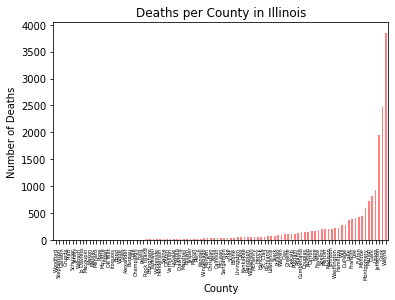

<Figure size 7200x864 with 0 Axes>

In [440]:
fig=plt.figure()
plt.bar(merged_df_illinois_sort["county"], merged_df_illinois_sort["deaths"], color='r', alpha=0.5, align="center", width=0.5)
plt.title("Deaths per County in Illinois")
plt.xlabel("County")
plt.ylabel("Number of Deaths")
plt.xlim(-0.75, len(merged_df_illinois_sort["county"])-0.25)
plt.xticks(rotation = 90, fontsize=5)
figure(num=None, figsize=(100,12))

In [442]:
fig.savefig("../../Visuals/Death per County in Illinois.png", dpi=100, bbox_inches='tight')
plt.show()

In [100]:
file_path = '../../Resources/illinois_zip_data.csv'
illinois_zip_data_df = pd.read_csv(file_path)
illinois_zip_data_df

,Unnamed: 0,zipcode,<20,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Black,Left Blank,Other,Asian,Hispanic,NH/PI*,AI/AN**,Male,Female,Unknown/Left Blank
0,0,60002,0,0,0,8,6,0,0,0,...,0,13,0,0,0,0,0,13,14,0
1,1,60004,0,8,0,9,12,10,0,0,...,0,15,0,6,0,0,0,28,20,0
2,2,60005,0,0,6,6,6,0,0,0,...,0,9,0,0,6,0,0,17,16,0
3,3,60007,0,0,6,0,14,8,9,0,...,0,14,0,0,7,0,0,23,22,0
4,4,60008,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,16,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,62702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
361,361,62711,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,362,62801,0,0,0,9,7,7,0,0,...,0,19,0,0,0,0,0,6,7,17
363,363,62901,0,12,0,0,0,0,0,7,...,10,6,0,0,0,0,0,11,15,0


In [112]:
illinois_zip_data_sum_df = illinois_zip_data_df.sum()
illinois_zip_data_sum_df

Unnamed: 0               66430
zipcode               22147800
<20                        163
20-29                     2219
30-39                     3019
40-49                     3680
50-59                     4096
60-69                     3072
70-79                     1633
80+                       1241
White                     5076
Black                     5575
Left Blank                5780
Other                      704
Asian                      436
Hispanic                  2580
NH/PI*                       0
AI/AN**                      0
Male                     10420
Female                   11068
Unknown/Left Blank          96
dtype: int64

0      13
1      28
2      17
3      23
4      16
       ..
360     0
361     0
362     6
363    11
364     0
Name: Male, Length: 365, dtype: int64

In [103]:
illinois_zip_data_males_df = illinois_zip_data_df["Male"].sum()
illinois_zip_data_males_df                                      

10420

In [104]:
illinois_zip_data_females_df = illinois_zip_data_df["Female"].sum()
illinois_zip_data_females_df  

11068

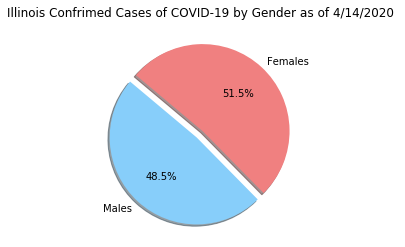

In [145]:
labels = ["Males", "Females"]

sizes = [illinois_zip_data_sum_df["Male"], illinois_zip_data_sum_df["Female"]]

colors = ["lightskyblue", "lightcoral"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Illinois Confrimed Cases of COVID-19 by Gender as of 4/14/2020 ")
plt.savefig("../../Visuals/llinois Confrimed Cases of COVID-19 by Gender.png", dpi=100)
plt.show()

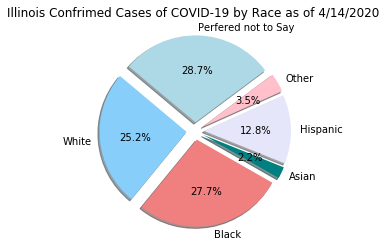

In [146]:
labels = ["White", "Black", "Asian", "Hispanic", "Other", "Perfered not to Say"]

sizes = [illinois_zip_data_sum_df["White"], illinois_zip_data_sum_df["Black"], illinois_zip_data_sum_df["Asian"],
         illinois_zip_data_sum_df["Hispanic"], illinois_zip_data_sum_df["Other"], illinois_zip_data_sum_df["Left Blank"]]

colors = ["lightskyblue", "lightcoral", "teal", "lavender", "pink", "lightblue"]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Illinois Confrimed Cases of COVID-19 by Race as of 4/14/2020 ")
plt.savefig("../../Visuals/llinois Confrimed Cases of COVID-19 by Race.png", dpi=100)
plt.show()

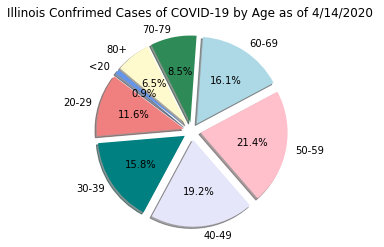

In [161]:
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69","70-79", "80+"]

sizes = [illinois_zip_data_sum_df["<20"], illinois_zip_data_sum_df["20-29"], illinois_zip_data_sum_df["30-39"],
         illinois_zip_data_sum_df["40-49"], illinois_zip_data_sum_df["50-59"], illinois_zip_data_sum_df["60-69"], 
         illinois_zip_data_sum_df["70-79"],illinois_zip_data_sum_df["80+"]]

colors = ["cornflowerblue", "lightcoral", "teal", "lavender", "pink", "lightblue", "seagreen", "lemonchiffon"]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Illinois Confrimed Cases of COVID-19 by Age as of 4/14/2020 ")
plt.savefig("../../Visuals/llinois Confrimed Cases of COVID-19 by Age.png", dpi=100)
plt.show()




In [152]:
illinois_zip_data_sum_df_table = illinois_zip_data_sum_df.transpose()
illinois_zip_data_sum_df_table

Unnamed: 0               66430
zipcode               22147800
<20                        163
20-29                     2219
30-39                     3019
40-49                     3680
50-59                     4096
60-69                     3072
70-79                     1633
80+                       1241
White                     5076
Black                     5575
Left Blank                5780
Other                      704
Asian                      436
Hispanic                  2580
NH/PI*                       0
AI/AN**                      0
Male                     10420
Female                   11068
Unknown/Left Blank          96
dtype: int64

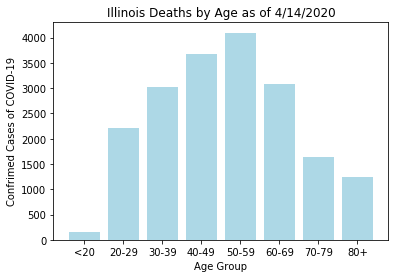

In [164]:
ages = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69","70-79", "80+"]
percentage = [illinois_zip_data_sum_df["<20"], illinois_zip_data_sum_df["20-29"], illinois_zip_data_sum_df["30-39"],
               illinois_zip_data_sum_df["40-49"], illinois_zip_data_sum_df["50-59"], illinois_zip_data_sum_df["60-69"], 
               illinois_zip_data_sum_df["70-79"],illinois_zip_data_sum_df["80+"]]
plt.bar(ages, percentage, color="lightblue", align="center")
plt.title("Illinois Deaths by Age as of 4/14/2020")
plt.xlabel("Age Group")
plt.ylabel("Confrimed Cases of COVID-19")
plt.savefig("../../Visuals/llinois Confrimed Cases of COVID-19 by Age BarChart.png", dpi=100)
plt.show()

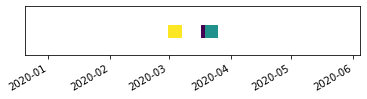

In [202]:
State = [1,2,3]

Dates = ["2020-03-20", "2020-03-22","2020-03-04"]

X = pd.to_datetime(Dates)
fig, ax = plt.subplots(figsize=(6,1))
ax.scatter(X, [1]*len(X), c=State,
           marker='s', s=150)
fig.autofmt_xdate()
ax.yaxis.set_visible(False)
#ax.xaxis.set_ticks_position('bottom')
#ax.get_yaxis().set_ticklabels([])

#day = pd.to_timedelta("1", unit='D')
#plt.xlim(X[3] - day, X[-3] + day)

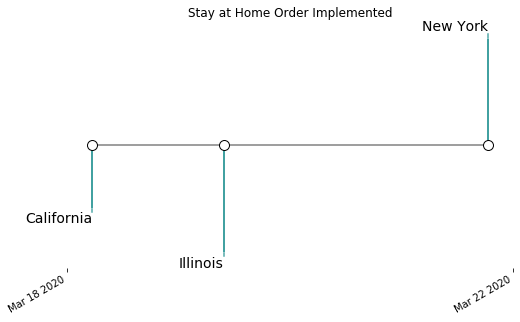

In [443]:
names = ['Illinois', 'New York', 'California']

dates = ['2020-03-20', '2020-03-22',
         '2020-03-19']
dates = [datetime.strptime(ii, "%Y-%m-%d") for ii in dates]

levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(8, 5))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='teal', alpha=5)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Stay at Home Order Implemented")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %d %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)

plt.savefig("../../Visuals/Stay at Home Order Implemented Timeline.png", dpi=100)
plt.show()


In [233]:
file_path = '../../Resources/global_cases.csv'
global_cases_df = pd.read_csv(file_path)
global_cases_df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
23557,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23558,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23559,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23560,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0


In [303]:
US = global_cases_df[global_cases_df["Country_Region"] == "US"]
US_IL = US[US["Province_State"] == "Illinois"]
US_IL

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
18942,26323,Illinois,US,2020-01-22,0.0,0.0
18943,26324,Illinois,US,2020-01-23,0.0,0.0
18944,26325,Illinois,US,2020-01-24,0.0,0.0
18945,26326,Illinois,US,2020-01-25,0.0,0.0
18946,26327,Illinois,US,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
19014,26395,Illinois,US,2020-04-03,8904.0,210.0
19015,26396,Illinois,US,2020-04-04,10357.0,244.0
19016,26397,Illinois,US,2020-04-05,11259.0,274.0
19017,26398,Illinois,US,2020-04-06,12262.0,307.0


In [261]:
type(global_cases_df["Country_Region"])

pandas.core.series.Series

In [ ]:
s.to_frame()

In [286]:
global_cases_grouped_df = global_cases_df.groupby('Country_Region').max()
global_cases_grouped_df

,Id,Date,ConfirmedCases,Fatalities
Country_Region,,,,
Afghanistan,77,2020-04-07,423.0,14.0
Albania,184,2020-04-07,383.0,22.0
Algeria,291,2020-04-07,1468.0,193.0
Andorra,398,2020-04-07,545.0,22.0
Angola,505,2020-04-07,17.0,2.0
...,...,...,...,...
Venezuela,32284,2020-04-07,165.0,7.0
Vietnam,32391,2020-04-07,249.0,0.0
West Bank and Gaza,32498,2020-04-07,261.0,1.0


In [288]:
global_cases_grouped_df.reset_index()
global_cases_grouped_df

,Id,Date,ConfirmedCases,Fatalities
Country_Region,,,,
Afghanistan,77,2020-04-07,423.0,14.0
Albania,184,2020-04-07,383.0,22.0
Algeria,291,2020-04-07,1468.0,193.0
Andorra,398,2020-04-07,545.0,22.0
Angola,505,2020-04-07,17.0,2.0
...,...,...,...,...
Venezuela,32284,2020-04-07,165.0,7.0
Vietnam,32391,2020-04-07,249.0,0.0
West Bank and Gaza,32498,2020-04-07,261.0,1.0


In [ ]:
global_cases_grouped_df

In [289]:
global_cases_grouped_sort_df = global_cases_grouped_df.sort_values(["ConfirmedCases"], ascending=False)
global_cases_grouped_sort_df

,Id,Date,ConfirmedCases,Fatalities
Country_Region,,,,
Spain,23296,2020-04-07,141942.0,14045.0
US,30572,2020-04-07,139875.0,5489.0
Italy,15592,2020-04-07,135586.0,17127.0
France,13131,2020-04-07,109069.0,10328.0
Germany,13559,2020-04-07,107663.0,2016.0
...,...,...,...,...
Bhutan,2859,2020-04-07,5.0,0.0
Gambia,13345,2020-04-07,4.0,1.0
Burundi,3822,2020-04-07,3.0,0.0


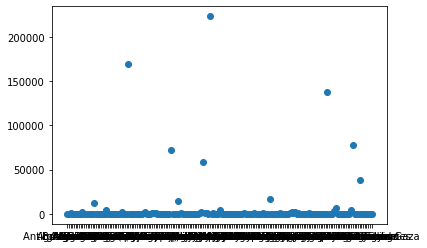

In [270]:
plt.scatter(global_cases_grouped_df["Country_Region"], global_cases_grouped_df["Fatalities"])

plt.show()

In [336]:
file_path = '../../Resources/WHO-COVID-19-global-data.csv'
global_cases_df = pd.read_csv(file_path)
global_cases_df

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed,Unnamed: 8
0,2/24/2020,AF,Afghanistan,EMRO,0,0,1,1,NaN
1,2/25/2020,AF,Afghanistan,EMRO,0,0,0,1,NaN
2,2/26/2020,AF,Afghanistan,EMRO,0,0,0,1,NaN
3,2/27/2020,AF,Afghanistan,EMRO,0,0,0,1,NaN
4,2/28/2020,AF,Afghanistan,EMRO,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...
8824,4/11/2020,ZW,Zimbabwe,AFRO,0,3,0,11,NaN
8825,4/12/2020,ZW,Zimbabwe,AFRO,0,3,2,13,NaN
8826,4/13/2020,ZW,Zimbabwe,AFRO,0,3,1,14,NaN
8827,4/14/2020,ZW,Zimbabwe,AFRO,0,3,3,17,NaN


In [337]:
type(global_cases_df["Cumulative Confirmed"])

dataTypeSeries = global_cases_df.dtypes
 

print(dataTypeSeries)

day                      object
Country                  object
Country Name             object
Region                   object
Deaths                    int64
Cumulative Deaths         int64
Confirmed                 int64
Cumulative Confirmed      int64
Unnamed: 8              float64
dtype: object


In [341]:
new = global_cases_df.groupby("Country Name")[["Cumulative Confirmed","Cumulative Deaths"]].max().reset_index()

new[new["Country Name"] == "Zimbabwe"]



,Country Name,Cumulative Confirmed,Cumulative Deaths
210,Zimbabwe,18,3


In [345]:
no = new.sort_values(["Cumulative Confirmed", "Cumulative Deaths"], ascending=False)
top_5 = no[:5]
top_5

,Country Name,Cumulative Confirmed,Cumulative Deaths
203,United States of America,578268,23476
183,Spain,172541,18056
99,Italy,162488,21069
74,Germany,127584,3254
68,France,102533,15708


<Figure size 432x288 with 0 Axes>

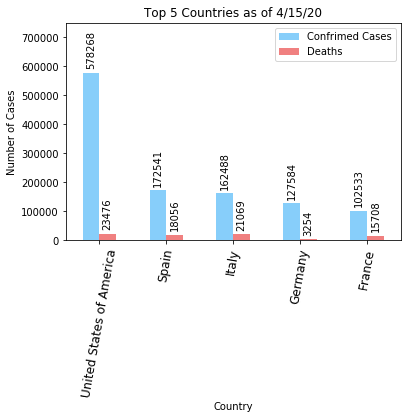

In [419]:
fig = plt.figure()
ax = top_5.plot(x="Country Name", y=["Cumulative Confirmed", "Cumulative Deaths"], kind="bar", color=["lightskyblue", "lightcoral"])
plt.title("Top 5 Countries as of 4/15/20")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.legend(['Confrimed Cases', 'Deaths'])

for p in ax.patches[0:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")
plt.ylim(0, 750000)        
plt.xticks(rotation = 80, fontsize=12)
plt.savefig("../../Visuals/Top 5 Countries BarChart.png", dpi=100, bbox_inches='tight')
plt.show()

In [410]:
fig.savefig("../../Visuals/Top 5 Countries BarChart.png", dpi=100)
plt.show()